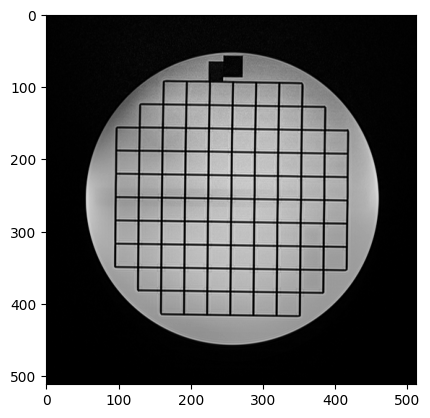

In [28]:
import numpy as np
import pydicom
import matplotlib.pyplot as plt

f = "C:/Users/HP/OneDrive/Documents/Study/AI/mri-phantom.ima"

dcm = pydicom.dcmread(f)
img = dcm.pixel_array
rng = np.random.default_rng(123)
noise =rng.integers(1000, size=[512,512])

plt.imshow(img, cmap="gray")
# print(img.shape)

pip install scikit-image

In [12]:
pip install scikit-image

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   - -------------------------------------- 0.4/12.8 MB 12.2 MB/s eta 0:00:02
   -- ------------------------------------- 0.8/12.8 MB 7.4 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/12.8 MB 6.6 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/12.8 MB 6.0 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/12.8 MB 6.0 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/12.8 MB 6.0 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/12.8 MB 6.0 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/12.8 MB 2.7 MB/s eta 0:00:05
   --- ------------------------------------ 1.3/12.8 MB 2.7 MB/s eta 0:00:05
   ---- ----------------------------------- 1.4/12.8 MB 2.7 MB/s eta 0:00:05
   ---- ----------------------------------- 1.5/12.8 MB 2.6 MB/s eta 0:00:05
   ----- ---------------------------------- 1.7/12.8 MB 2.6 MB/s eta 0:00:05
   --

501


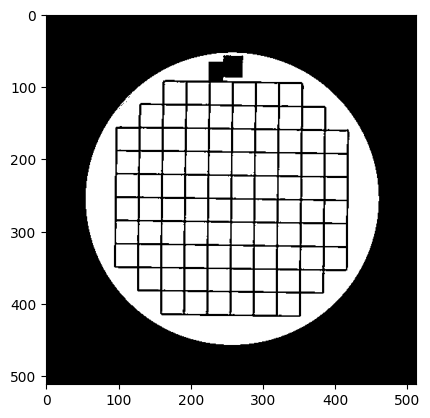

In [14]:
from skimage import filters

thres = filters.threshold_otsu(img)
print(thres)

bw = img>thres
plt.imshow(bw, cmap="gray")

In [15]:
pip install morphology

     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ------------------------------ --------- 30.7/40.3 kB ? eta -:--:--
     -------------------------------------- 40.3/40.3 kB 477.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for morphology: filename=morphology-0.11.12-py3-none-any.whl size=28124 sha256=fdedd43bc05d837ecae1b58ec6ea03c7b84635c16b926f4b44b8a07f63ebc852
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\a5\b9\7c\6f004f12c0006f354095d544da2ebb2a2db5a772e7441eaefe
Successfully built morphology
Note: you may need to restart the kernel to use updated packages.


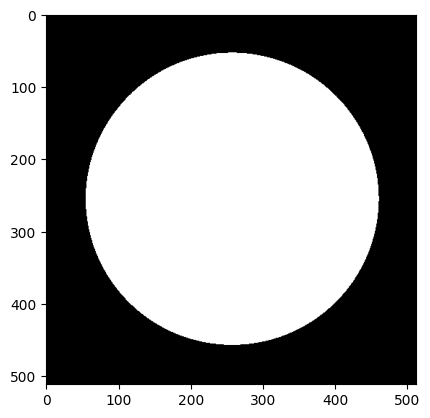

In [17]:
from skimage import morphology

area = np.sum(bw)
bw_solid =  morphology.remove_small_holes(bw, area/2)
plt.imshow(bw_solid, cmap="gray")

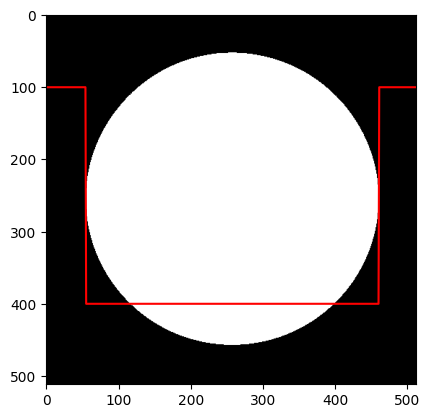

In [29]:
profil = np.any(bw_solid,axis = 0)
_, ax = plt.subplots()
ax.imshow(bw_solid, cmap="gray")
ax.plot(profil*300 + 100, 'r-')

In [25]:
width = np.sum(profil)
print(f"width : {width} pixels")
res = dcm.PixelSpacing
print(f"width : {width * res[1]}mm")

width : 406 pixels
width : 190.3125mm


In [30]:
512 * 512 

262144